# **Types of CNN**

## ***1. LeNet-5***




In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def plot_images_sample(X, Y):
    # Draw plot for images sample
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

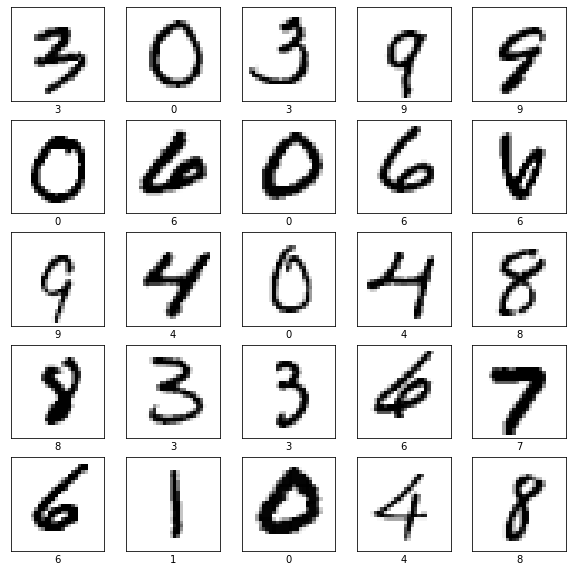

In [4]:
# Draw plot for images sample
plot_images_sample(x_train,y_train)

In [5]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [6]:
# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Add the first subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Add the second subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
# Flatten the output from the subsampling layers
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=120, activation='relu'))

# Add the final fully connected layer
model.add(Dense(units=84, activation='relu'))

# Add the output layer
model.add(Dense(units=10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 36s 75ms/step - loss: 0.3438 - accuracy: 0.8965 - val_loss: 0.0991 - val_accuracy: 0.9706
Epoch 2/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0582 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0505 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0495 - val_accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0368 - val_accuracy:

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0322 - accuracy: 0.9902
Test loss: 0.032164573669433594
Test accuracy: 0.9901999831199646


313/313 - 2s - loss: 0.0322 - accuracy: 0.9902 - 2s/epoch - 6ms/step


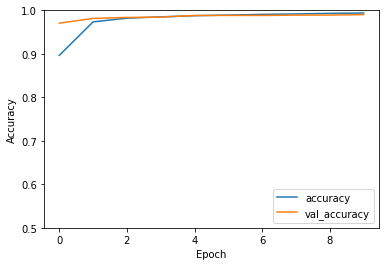

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

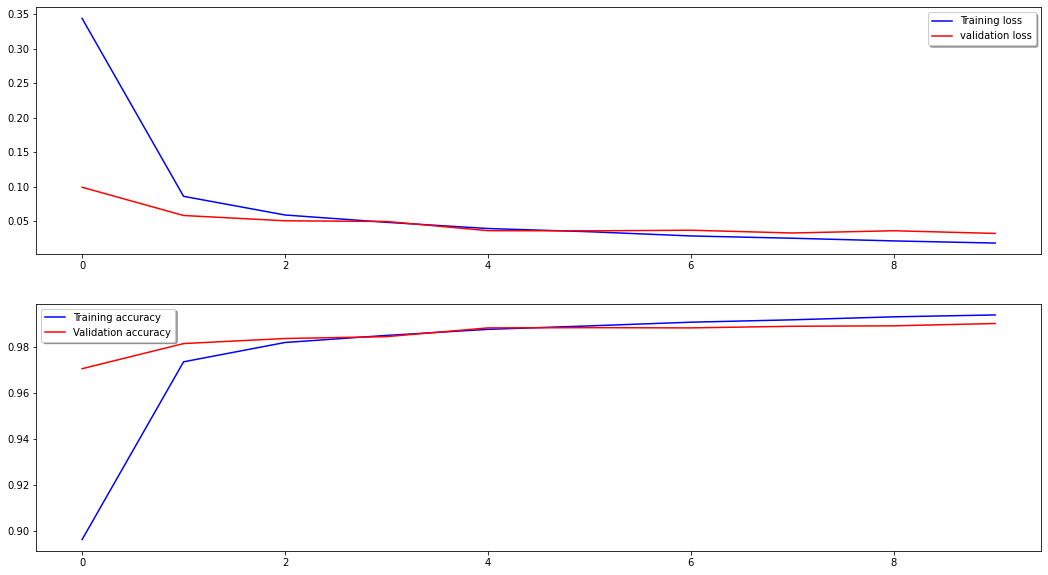

In [11]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
def get_predictions(X_test):
    # Digits prediction
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    return predictions

313/313 [==============================] - 2s 6ms/step


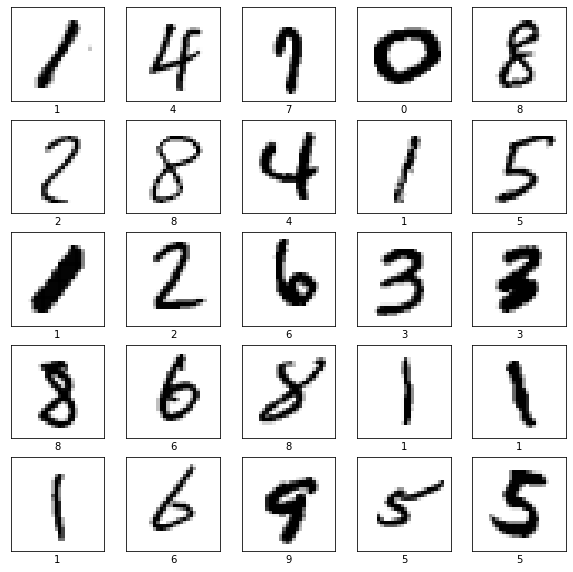

In [13]:
# Prediction and display it
predictions = get_predictions(x_test)
plot_images_sample(x_test, predictions)

# ***2. AlexNet***

In [14]:
# Define the AlexNet model
from keras.layers import Dense, Dropout, Flatten
model_alex = Sequential()
model_alex.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))
model_alex.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model_alex.add(Flatten())
model_alex.add(Dense(128, activation='relu'))
model_alex.add(Dropout(0.5))
model_alex.add(Dense(10, activation='softmax'))

In [16]:
# Compile the model
model_alex.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Train the model
history_alexnet = model_alex.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 50s 105ms/step - loss: 2.2997 - accuracy: 0.1238 - val_loss: 2.2792 - val_accuracy: 0.1483
Epoch 2/12
469/469 [==============================] - 49s 104ms/step - loss: 2.2711 - accuracy: 0.1597 - val_loss: 2.2507 - val_accuracy: 0.2573
Epoch 3/12
469/469 [==============================] - 49s 103ms/step - loss: 2.2437 - accuracy: 0.2037 - val_loss: 2.2224 - val_accuracy: 0.3732
Epoch 4/12
469/469 [==============================] - 48s 103ms/step - loss: 2.2148 - accuracy: 0.2585 - val_loss: 2.1927 - val_accuracy: 0.4528
Epoch 5/12
469/469 [==============================] - 48s 103ms/step - loss: 2.1850 - accuracy: 0.3088 - val_loss: 2.1609 - val_accuracy: 0.5280
Epoch 6/12
469/469 [==============================] - 48s 103ms/step - loss: 2.1540 - accuracy: 0.3523 - val_loss: 2.1259 - val_accuracy: 0.5953
Epoch 7/12
469/469 [==============================] - 48s 103ms/step - loss: 2.1188 - accuracy: 0.3975 - val_loss: 2.0867 - val_ac

In [17]:
# Evaluate the model on the test data
score = model_alex.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.813056468963623
Test accuracy: 0.7465999722480774


313/313 - 3s - loss: 1.8131 - accuracy: 0.7466 - 3s/epoch - 8ms/step


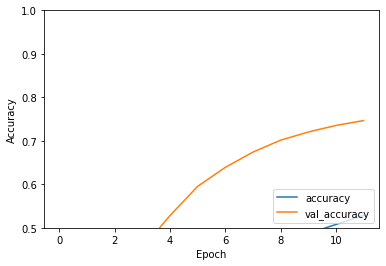

In [18]:
plt.plot(history_alexnet.history['accuracy'], label='accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_alex.evaluate(x_test, y_test, verbose=2)

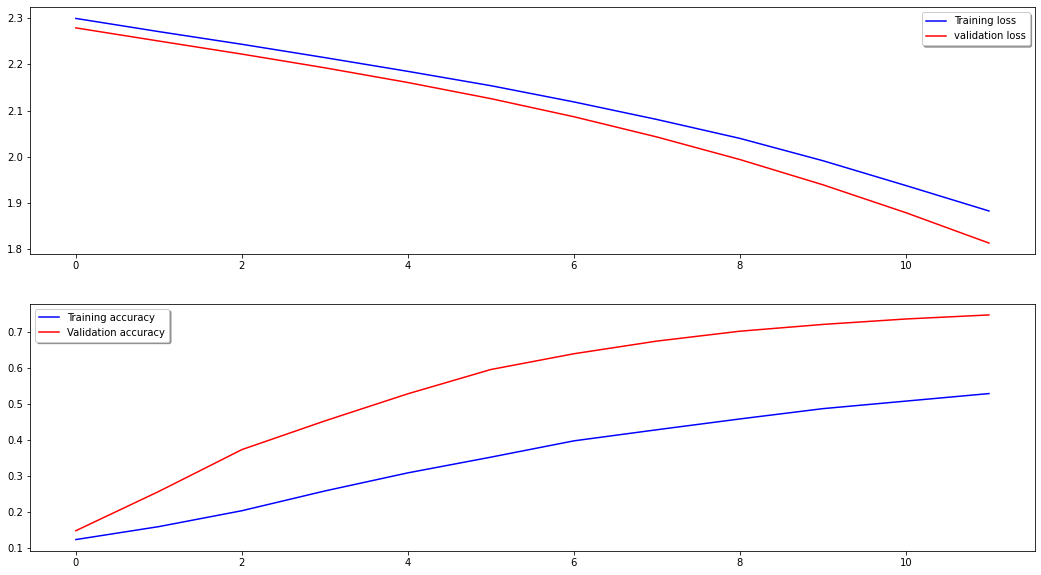

In [19]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_alexnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_alexnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_alexnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_alexnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
def get_predictions(X_test):
    # Digits prediction
    predictions_alex = model_alex.predict(X_test)
    predictions_alex = np.argmax(predictions_alex, axis=1)
    return predictions_alex

313/313 [==============================] - 3s 9ms/step


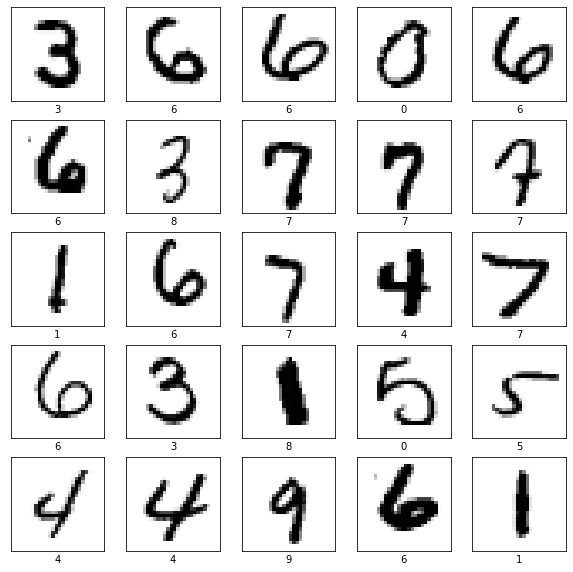

In [21]:
# Prediction and display it
predictions_alex = get_predictions(x_test)
plot_images_sample(x_test, predictions_alex)

# ***3. ZFNet***

In [22]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras

# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Preprocess the data
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# # Reshape the data from (28, 28) to (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

# # Convert the labels from integers to one-hot vectors
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

# # Define the model architecture
# model_zfnet = keras.Sequential([
#     keras.layers.Conv2D(96, (7, 7), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [23]:
# # Compile the model
# model_zfnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history_zfnet = model_zfnet.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# # Evaluate the model on the test data
# test_loss, test_acc = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test accuracy:', test_acc)

In [24]:
# # Evaluate the model on the test data
# score_zf = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# ***3. VGGNet***

In [27]:
from keras.optimizers import Adam

# build the model
model_vggnet = Sequential()
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Flatten())
model_vggnet.add(Dense(512, activation='relu'))
model_vggnet.add(Dropout(0.5))
model_vggnet.add(Dense(10, activation='softmax'))


In [31]:
# compile the model
model_vggnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model
history_vggnet = model_vggnet.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 279s 593ms/step - loss: 0.1263 - accuracy: 0.9611 - val_loss: 0.0347 - val_accuracy: 0.9876
Epoch 2/10
469/469 [==============================] - 271s 577ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 3/10
469/469 [==============================] - 268s 571ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0238 - val_accuracy: 0.9913
Epoch 4/10
469/469 [==============================] - 267s 569ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0218 - val_accuracy: 0.9931
Epoch 5/10
469/469 [==============================] - 266s 566ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0205 - val_accuracy: 0.9931
Epoch 6/10
469/469 [==============================] - 268s 571ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0197 - val_accuracy: 0.9935
Epoch 7/10
469/469 [==============================] - 265s 565ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0162 -

In [32]:
# Evaluate the model on the test data
score = model_vggnet.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018202107399702072
Test accuracy: 0.9940000176429749


313/313 - 11s - loss: 0.0182 - accuracy: 0.9940 - 11s/epoch - 35ms/step


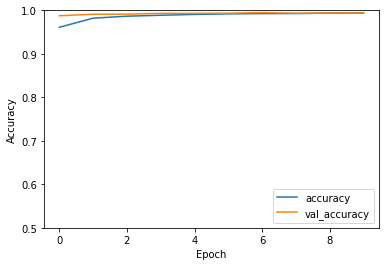

In [33]:
plt.plot(history_vggnet.history['accuracy'], label='accuracy')
plt.plot(history_vggnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_vggnet.evaluate(x_test, y_test, verbose=2)

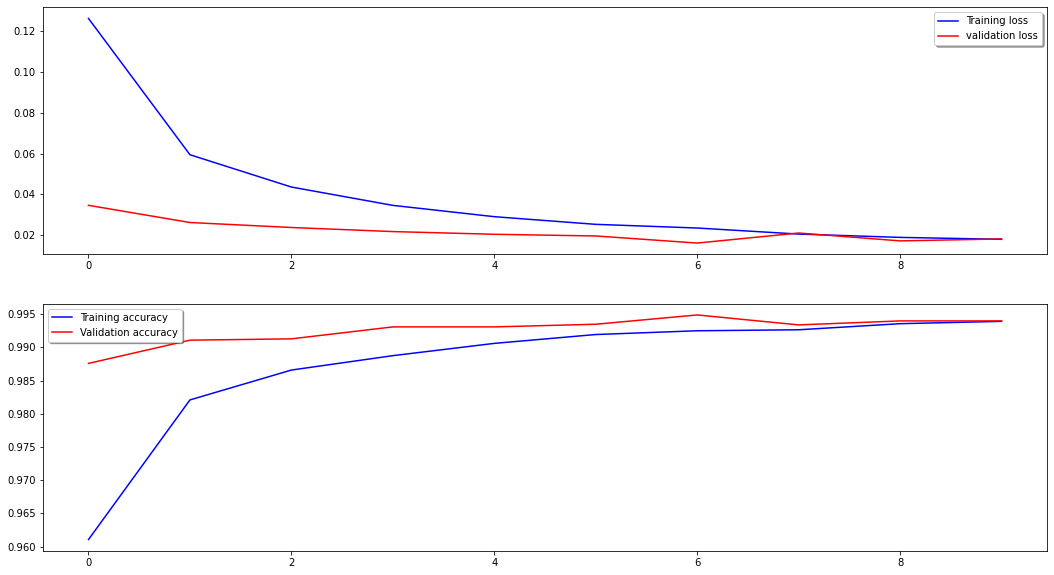

In [34]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_vggnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_vggnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_vggnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_vggnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [35]:
def get_predictions(X_test):
    # Digits prediction
    predictions_vggnet = model_vggnet.predict(X_test)
    predictions_vggnet = np.argmax(predictions_vggnet, axis=1)
    return predictions_vggnet

313/313 [==============================] - 12s 38ms/step


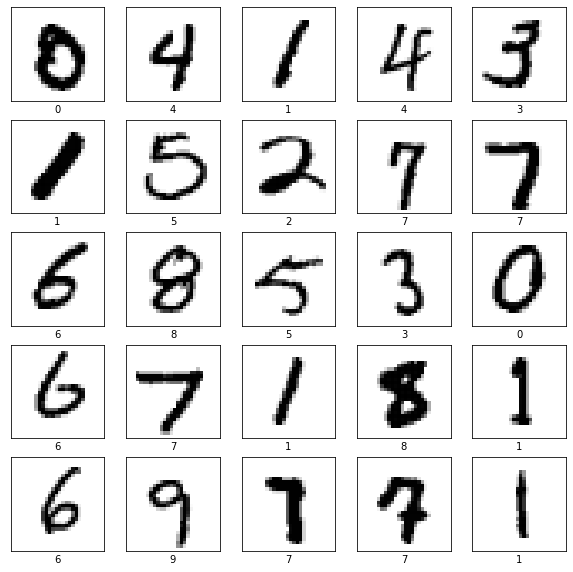

In [36]:
# Prediction and display it
predictions_vggnet = get_predictions(x_test)
plot_images_sample(x_test, predictions_vggnet)

# ***4. GoogLeNet***

In [43]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))


# inception module 1
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

# inception module 2
tower_1 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_1 = Conv2D(128, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_2 = Conv2D(128, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(output)
tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)


In [44]:
# additional layers
output = AveragePooling2D((5,5), strides=(3,3), padding='valid')(output)
output = Flatten()(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(10, activation='softmax')(output)

model_gnet = Model(inputs=input_img, outputs=output)


In [46]:
# compile the model
model_gnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:

# train the model
history_gnet = model_gnet.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
 18/469 [>.............................] - ETA: 1:28:39 - loss: 1.6485 - accuracy: 0.4266